## **K-NN and Cross-Validation (from Scratch)**

### **Import Libraries and Load the Dataset**

In [17]:
import numpy as np
from sklearn.datasets import load_wine

data = load_wine()
X, y = data.data, data.target

### **Implement the Euclidean distance function**

* Implement the Euclidean distance function for n-dimensional points.

In [18]:
def euclidean_distance(point1, point2):
  """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Parameters:
    - point1 (array-like): The first point, represented as an iterable of numerical values.
    - point2 (array-like): The second point, represented as an iterable of numerical values.

    Returns:
    - float: The Euclidean distance between point1 and point2.

    Note:
    The two points must have the same dimensionality.
  """
  return np.sqrt(np.sum((point1 - point2) ** 2))

 ### **Implement from scratch a k-NN classifier.**

 * Create a function to find the k-nearest neighbors of a given data point.

In [19]:
def get_k_nearest_neighbors(X_train, test_point, k):
  """
    Identify the indices of the k-nearest neighbors of a given test point from a set of training points.

    Parameters:
    - X_train (array-like): A collection of training points, where each point is represented as an iterable of numerical values.
    - test_point (array-like): The test point for which the k-nearest neighbors need to be found, represented as an iterable of numerical values.
    - k (int): The number of nearest neighbors to retrieve.

    Returns:
    - array-like: Indices of the k-nearest training points to the test point.

    Note:
    Uses the Euclidean distance to compute the proximity between points.
  """
  # distances is the array of distances between a test point and every point in the training set
  distances = [euclidean_distance(test_point, train_point) for train_point in X_train] # notice the call to the function euclidian_distance()
  k_nearest = np.argsort(distances)[:k] # # np.argsort() is particularly useful in algorithms like k-NN where we want to find the indices of the nearest neighbors (smallest distances) without actually sorting the entire distance array.
  return k_nearest

### **Write a function to predict the class of a given data point using k-NN based on majority voting.**

In [20]:
def predict(X_train, y_train, test_point, k):
  """
    Predict the label of a given test point based on the majority label of its k-nearest neighbors.

    Parameters:
    - X_train (array-like): A collection of training points, where each point is represented as an iterable of numerical values.
    - y_train (array-like): Labels corresponding to the training points.
    - test_point (array-like): The test point for which the label needs to be predicted, represented as an iterable of numerical values.
    - k (int): The number of nearest neighbors to consider for prediction.

    Returns:
    - int or str: Predicted label for the test point based on majority voting among its k-nearest neighbors.

    Note:
    In case of a tie (i.e., multiple labels having the same count among the k-nearest neighbors), the label returned is based on the order in the data.
  """
  k_nearest = get_k_nearest_neighbors(X_train, test_point, k) # notice the call to the function get_k_nearest_neighbors()
  k_nearest_labels = [y_train[i] for i in k_nearest]
  return max(k_nearest_labels, key=k_nearest_labels.count)

### **Implement Cross-Validation**

* Create a function that partitions the dataset into k folds.
* For each fold, treat it once as a validation set while the k-1 remaining folds form the training set.
* Calculate accuracy for each fold.
* Return the average accuracy across all folds.




In [21]:
def k_fold_split(X, y, k, random_seed=42):
    """
    Generates indices for k consecutive folds for cross-validation.

    Parameters:
    - X (array-like): Features of the dataset.
    - y (array-like): Target labels corresponding to the dataset.
    - k (int): Number of folds for cross-validation.
    - random_seed (int, optional): Seed for random number generator for reproducibility. Default is None.

    Returns:
    - list of array-like: List of indices for each of the k folds.

    Note:
    The function does not split the dataset itself, but rather provides indices for each fold.
    """
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    # Determine the size of each fold
    # Here, we're determining the base size of each fold.
    # The // operator is a floor division, which means it will
    # give the integer quotient of the division. So, len(X) // k
    # gives the size of each fold if the dataset X was perfectly
    # divisible by k. The multiplication by k creates a list where
    # each entry represents the size of a fold. At this point, each fold has the same size.
    fold_sizes = [len(X) // k] * k

    # If not be perfectly divisible by k. The remainder when len(X) is divided by k is given by len(X) % k
    # ensuring each fold has roughly the same number of samples.
    for i in range(len(X) % k):
        fold_sizes[i] += 1

    all_folds = []
    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        all_folds.append(indices[start:stop])
        current = stop

    return all_folds

### **Function to perform k-NN and evaluate its performance using cross-validation**

In [22]:
import matplotlib.pyplot as plt

def cross_val_score_with_scores(X, y, k, cv):
    """
    Evaluates the performance of the k-NN algorithm using k-fold cross-validation and returns accuracy scores for each fold.

    Parameters:
    - X (array-like): Features of the dataset.
    - y (array-like): Target labels corresponding to the dataset.
    - k (int): Number of nearest neighbors to consider for the k-NN prediction.
    - cv (int): Number of folds for cross-validation.

    Returns:
    - list of float: Accuracy scores of the k-NN algorithm for each fold.

    Note:
    The function internally uses the `predict` function for k-NN prediction.
    """
    fold_indices = k_fold_split(X, y, cv)
    scores = []
    for i in range(cv):
        validation_idx = fold_indices[i]
        train_idx = [idx for j in range(cv) if j != i for idx in fold_indices[j]]

        X_train, X_val = X[train_idx], X[validation_idx]
        y_train, y_val = y[train_idx], y[validation_idx]

        predictions = [predict(X_train, y_train, test_point, k) for test_point in X_val]
        accuracy = np.mean(np.array(predictions) == y_val)
        print(accuracy)
        scores.append(accuracy)

    return scores

### **Visualize**

0.8055555555555556
0.6111111111111112
0.6666666666666666
0.6571428571428571
0.8571428571428571


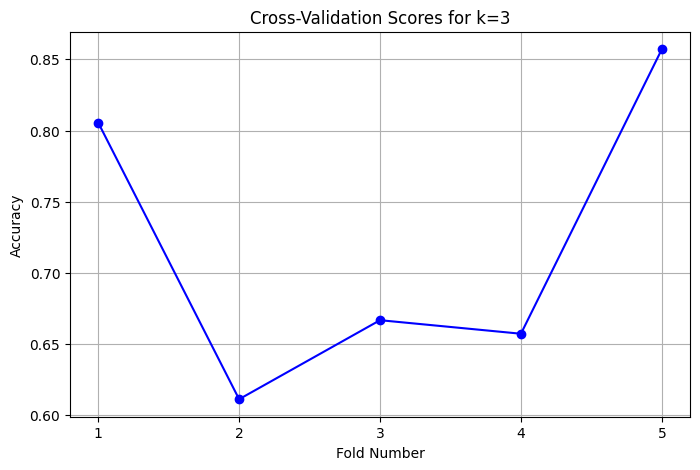

In [23]:
 # Call the modified cross-validation function for k=3 and cv=5 (5 folds)
folds=5
scores = cross_val_score_with_scores(X, y, k=3, cv=folds)


# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, folds+1), scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores for k=3')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, folds+1))
plt.grid(True)
plt.show()